## 1. Local and global thought patterns
<p>While we might not be Twitter fans, we have to admit that it has a huge influence on the world (who doesn't know about Trump's tweets). Twitter data is not only gold in terms of insights, but <strong><em>Twitter-storms are available for analysis in near real-time</em></strong>. This means we can learn about the big waves of thoughts and moods around the world as they arise. </p>
<p>As any place filled with riches, Twitter has <em>security guards</em> blocking us from laying our hands on the data right away ⛔️ Some  authentication steps (really straightforward) are needed to call their APIs for data collection. Since our goal today is learning to extract insights from data, we have already gotten a green-pass from security ✅ Our data is ready for usage in the datasets folder — we can concentrate on the fun part! 🕵️‍♀️🌎
<br>
<br>
<img src="https://assets.datacamp.com/production/project_760/img/tweets_influence.png" style="width: 300px">
<hr>
<br>Twitter provides both global and local trends. Let's load and inspect data for topics that were hot worldwide (WW) and in the United States (US) at the moment of query  — snapshot of JSON response from the call to Twitter's <i>GET trends/place</i> API.</p>
<p><i><b>Note</b>: <a href="https://developer.twitter.com/en/docs/trends/trends-for-location/api-reference/get-trends-place.html">Here</a> is the documentation for this call, and <a href="https://developer.twitter.com/en/docs/api-reference-index.html">here</a> a full overview on Twitter's APIs.</i></p>

In [67]:
# Loading json module
import json

# Load WW_trends and US_trends data
with open('datasets/WWTrends.json') as file:
    json_content = file.read()
    WW_trends = json.loads(json_content)

with open('datasets/USTrends.json') as file:
    json_content = file.read()
    US_trends = json.loads(json_content)

# Inspecting data by printing out WW_trends and US_trends variables
print("WW_trends:")
print(WW_trends)
print("US_trends:")
print(US_trends)

WW_trends:
[{'trends': [{'name': '#BeratKandili', 'url': 'http://twitter.com/search?q=%23BeratKandili', 'promoted_content': None, 'query': '%23BeratKandili', 'tweet_volume': 46373}, {'name': '#GoodFriday', 'url': 'http://twitter.com/search?q=%23GoodFriday', 'promoted_content': None, 'query': '%23GoodFriday', 'tweet_volume': 81891}, {'name': '#WeLoveTheEarth', 'url': 'http://twitter.com/search?q=%23WeLoveTheEarth', 'promoted_content': None, 'query': '%23WeLoveTheEarth', 'tweet_volume': 159698}, {'name': '#195TLdenTTVerilir', 'url': 'http://twitter.com/search?q=%23195TLdenTTVerilir', 'promoted_content': None, 'query': '%23195TLdenTTVerilir', 'tweet_volume': None}, {'name': '#AFLNorthDons', 'url': 'http://twitter.com/search?q=%23AFLNorthDons', 'promoted_content': None, 'query': '%23AFLNorthDons', 'tweet_volume': None}, {'name': 'Shiv Sena', 'url': 'http://twitter.com/search?q=%22Shiv+Sena%22', 'promoted_content': None, 'query': '%22Shiv+Sena%22', 'tweet_volume': None}, {'name': 'Lyra McKe

## 2. Prettifying the output
<p>Our data was hard to read! Luckily, we can resort to the <i>json.dumps()</i> method to have it formatted as a pretty JSON string.</p>

In [69]:
# Pretty-printing the results.

print("WW trends:")
print(json.dumps(WW_trends, indent=1))

print("\n", "US trends:")
print(json.dumps(US_trends, indent=1))

WW trends:
[
 {
  "trends": [
   {
    "name": "#BeratKandili",
    "url": "http://twitter.com/search?q=%23BeratKandili",
    "promoted_content": null,
    "query": "%23BeratKandili",
    "tweet_volume": 46373
   },
   {
    "name": "#GoodFriday",
    "url": "http://twitter.com/search?q=%23GoodFriday",
    "promoted_content": null,
    "query": "%23GoodFriday",
    "tweet_volume": 81891
   },
   {
    "name": "#WeLoveTheEarth",
    "url": "http://twitter.com/search?q=%23WeLoveTheEarth",
    "promoted_content": null,
    "query": "%23WeLoveTheEarth",
    "tweet_volume": 159698
   },
   {
    "name": "#195TLdenTTVerilir",
    "url": "http://twitter.com/search?q=%23195TLdenTTVerilir",
    "promoted_content": null,
    "query": "%23195TLdenTTVerilir",
    "tweet_volume": null
   },
   {
    "name": "#AFLNorthDons",
    "url": "http://twitter.com/search?q=%23AFLNorthDons",
    "promoted_content": null,
    "query": "%23AFLNorthDons",
    "tweet_volume": null
   },
   {
    "name": "Shiv Sen

## 3.  Finding common trends
<p>🕵️‍♀️ From the pretty-printed results (output of the previous task), we can observe that:</p>
<ul>
<li><p>We have an array of trend objects having: the name of the trending topic, the query parameter that can be used to search for the topic on Twitter-Search, the search URL and the volume of tweets for the last 24 hours, if available. (The trends get updated every 5 mins.)</p></li>
<li><p>At query time <b><i>#BeratKandili, #GoodFriday</i></b> and <b><i>#WeLoveTheEarth</i></b> were trending WW.</p></li>
<li><p><i>"tweet_volume"</i> tell us that <i>#WeLoveTheEarth</i> was the most popular among the three.</p></li>
<li><p>Results are not sorted by <i>"tweet_volume"</i>. </p></li>
<li><p>There are some trends which are unique to the US.</p></li>
</ul>
<hr>
<p>It’s easy to skim through the two sets of trends and spot common trends, but let's not do "manual" work. We can use Python’s <strong>set</strong> data structure to find common trends — we can iterate through the two trends objects, cast the lists of names to sets, and call the intersection method to get the common names between the two sets.</p>

In [71]:
# Extracting all the WW trend names from WW_trends
world_trends = set([trend['name'] for trend in WW_trends[0]['trends']])

# Extracting all the US trend names from US_trends
us_trends = set([trend['name'] for trend in US_trends[0]['trends']]) 

# Getting the intersection of the two sets of trends
common_trends = world_trends.intersection(us_trends)

# Inspecting the data
print(world_trends, "\n")
print(us_trends, "\n")
print (len(common_trends), "common trends:", common_trends)

{'重体の女性と女児', '#CHIvLIO', '池袋の事故', '#يوم_الجمعه', '#195TLdenTTVerilir', '#Jersey', 'Derry', 'Berat Kandilimiz', '#ConCalmaRemix', 'Hemant Karkare', '#Ontas', '高齢者', '#IndonesianElectionHeroes', 'プリウス', 'Lil Dicky', '#19aprile', '#DragRace', 'グレア', '#HanumanJayanti', '#ViernesSanto', '#HayırlıCumalar', '#ProtestoEdiyorum', '免許返納', '#اغلاق_BBM', '歩行者', '#NRLBulldogsSouths', '十二国記', '刀ステ', '브이알', '#JunquerasACN', '#BeratKandili', '東京・池袋衝突事故', 'Shiv Sena', '#BLACKPINKxCorden', '#GoodFriday', '#NikahUmurBerapa', 'örgütdeğil arkadaşgrubu', '#DinahJane1', '#ShivSena', '#HardikPatel', '#KpuJanganCurang', 'Priyanka Chaturvedi', '#TheJudasInMyLife', 'Derrick White', '#AFLNorthDons', '#HayırlıKandiller', 'Lyra McKee', '#DuyguAsena', '#Karfreitag', '#WeLoveTheEarth'} 

{'#GossipShouldBe', 'Servais', '#RPDR', 'Derry', '#ConCalmaRemix', '#GSWvsLAC', '#TimeToImpeach', '#WeirdDateStories', '#WorldofWarcraftMains', '#CriticalRoleSpoilers', 'Kevin Durant', 'Lil Dicky', '#TheLegendOfVoxMachina', '#DragRac

## 4. Exploring the hot trend
<p>🕵️‍♀️ From the intersection (last output) we can see that, out of the two sets of trends (each of size 50), we have 11 overlapping topics. In particular, there is one common trend that sounds very interesting: <i><b>#WeLoveTheEarth</b></i> — so good to see that <em>Twitteratis</em> are unanimously talking about loving Mother Earth! 💚 </p>
<p><i><b>Note</b>: We could have had no overlap or a much higher overlap; when we did the query for getting the trends, people in the US could have been on fire obout topics only relevant to them.</i>
<br>
<img src="https://assets.datacamp.com/production/project_760/img/earth.jpg" style="width: 500px"></p>
<div style="text-align: center;"><i>Image Source:Official Music Video Cover: https://welovetheearth.org/video/</i></div>
<hr>
<p>We have found a hot-trend, #WeLoveTheEarth. Now let's see what story it is screaming to tell us! <br>
If we query Twitter's search API with this hashtag as query parameter, we get back actual tweets related to it. We have the response from the search API stored in the datasets folder as <i>'WeLoveTheEarth.json'</i>. So let's load this dataset and do a deep dive in this trend.</p>

In [73]:
# Loading the data
with open('datasets/WeLoveTheEarth.json') as file:
    json_content = file.read()
tweets = json.loads(json_content)

# Inspecting some tweets
tweets[0:2]

[{'created_at': 'Fri Apr 19 08:46:48 +0000 2019',
  'id': 1119160405270523904,
  'id_str': '1119160405270523904',
  'text': 'RT @lildickytweets: 🌎 out now #WeLoveTheEarth https://t.co/L22XsoT5P1',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'WeLoveTheEarth', 'indices': [30, 45]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'lildickytweets',
     'name': 'LD',
     'id': 1209516660,
     'id_str': '1209516660',
     'indices': [3, 18]}],
   'urls': [{'url': 'https://t.co/L22XsoT5P1',
     'expanded_url': 'https://youtu.be/pvuN_WvF1to',
     'display_url': 'youtu.be/pvuN_WvF1to',
     'indices': [46, 69]}]},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 212

## 5. Digging deeper
<p>🕵️‍♀️ Printing the first two tweet items makes us realize that there’s a lot more to a tweet than what we normally think of as a tweet — there is a lot more than just a short text!</p>
<hr>
<p>But hey, let's not get overwhemled by all the information in a tweet object! Let's focus on a few interesting fields and see if we can find any hidden insights there. </p>

In [75]:
# Extracting the text of all the tweets from the tweet object
texts = [tweet['text'] for tweet in tweets]

# Extracting screen names of users tweeting about #WeLoveTheEarth
names = [user_mention['screen_name'] for tweet in tweets for user_mention in tweet['entities']['user_mentions']]

# Extracting all the hashtags being used when talking about this topic
hashtags = [hashtag['text'] for tweet in tweets for hashtag in tweet['entities']['hashtags']]

# Inspecting the first 10 results
print (json.dumps(texts[0:10], indent=1),"\n")
print (json.dumps(names[0:10], indent=1),"\n")
print (json.dumps(hashtags[0:10], indent=1),"\n")

[
 "RT @lildickytweets: \ud83c\udf0e out now #WeLoveTheEarth https://t.co/L22XsoT5P1",
 "\ud83d\udc9a\ud83c\udf0e\ud83d\udc9a  #WeLoveTheEarth \ud83d\udc47\ud83c\udffc",
 "RT @cabeyoomoon: Ta piosenka to bop,  wpada w ucho  i dochody z niej id\u0105 na dobry cel,  warto s\u0142ucha\u0107 w k\u00f3\u0142ko i w k\u00f3\u0142ko gdziekolwiek si\u0119 ty\u2026",
 "#WeLoveTheEarth \nCzemu ja si\u0119 pop\u0142aka\u0142am",
 "RT @Spotify: This is epic. @lildickytweets got @justinbieber, @arianagrande, @halsey, @sanbenito, @edsheeran, @SnoopDogg, @ShawnMendes, @Kr\u2026",
 "RT @biebercentineo: Justin : are we gonna die? \nLil dicky: you know bieber we might die \n\nBTCH IM CRYING #EARTH #WeLoveTheEarth #WELOVEEART\u2026",
 "RT @dreamsiinflate: #WeLoveTheEarth \u201ci am a fat fucking pig\u201d okay brendon urie https://t.co/FdJmq31xZc",
 "Literally no one:\n\nMe in the past 4 hours:\n\nI'm a koala and I sleep all the time, so what, it's cute \ud83c\udfb6\n\n#WeLoveTheEarth #EdSheeranTheKoala",

## 6. Frequency analysis
<p>🕵️‍♀️ Just from the first few results of the last extraction, we can deduce that:</p>
<ul>
<li>We are talking about a song about loving the Earth.</li>
<li>A lot of big artists are the forces behind this Twitter wave, especially Lil Dicky.</li>
<li>Ed Sheeran was some cute koala in the song — "EdSheeranTheKoala" hashtag! 🐨</li>
</ul>
<hr>
<p>Observing the first 10 items of the interesting fields gave us a sense of the data. We can now take a closer look by doing a simple, but very useful, exercise — computing frequency distributions. Starting simple with frequencies is generally a good approach; it helps in getting ideas about how to proceed further.</p>

In [77]:
# Importing modules
from collections import Counter

# Counting occcurrences/ getting frequency dist of all names and hashtags
for item in [names, hashtags]:
    c = Counter(item) 
    # Inspecting the 10 most common items in c
    print (c.most_common(10), "\n")

[('lildickytweets', 102), ('LeoDiCaprio', 44), ('ShawnMendes', 33), ('halsey', 31), ('ArianaGrande', 30), ('justinbieber', 29), ('Spotify', 26), ('edsheeran', 26), ('sanbenito', 25), ('SnoopDogg', 25)] 

[('WeLoveTheEarth', 313), ('4future', 12), ('19aprile', 12), ('EARTH', 11), ('fridaysforfuture', 10), ('EarthMusicVideo', 3), ('ConCalmaRemix', 3), ('Earth', 3), ('aliens', 2), ('AvengersEndgame', 2)] 



## 7. Activity around the trend
<p>🕵️‍♀️ Based on the last frequency distributions we can further build-up on our deductions:</p>
<ul>
<li>We can more safely say that this was a music video about Earth (hashtag 'EarthMusicVideo') by Lil Dicky. </li>
<li>DiCaprio is not a music artist, but he was involved as well <em>(Leo is an environmentalist so not a surprise to see his name pop up here)</em>. </li>
<li>We can also say that the video was released on a Friday; very likely on April 19th. </li>
</ul>
<p><em>We have been able to extract so many insights. Quite powerful, isn't it?!</em></p>
<hr>
<p>Let's further analyze the data to find patterns in the activity around the tweets — <b>did all retweets occur around a particular tweet? </b><br></p>
<p>If a tweet has been retweeted, the <i>'retweeted_status'</i>  field gives many interesting details about the original tweet itself and its author. </p>
<p>We can measure a tweet's popularity by analyzing the <b><i>retweet<em>count</em></i></b> and <b><i>favoritecount</i></b> fields. But let's also extract the number of followers of the tweeter  —  we have a lot of celebs in the picture, so <b>can we tell if their advocating for #WeLoveTheEarth influenced a significant proportion of their followers?</b></p>
<hr>
<p><i><b>Note</b>: The retweet_count gives us the total number of times the original tweet was retweeted. It should be the same in both the original tweet and all the next retweets. Tinkering around with some sample tweets and the official documentaiton are the way to get your head around the mnay fields.</i></p>

In [79]:
# Extracting useful information from retweets
retweets = [(tweet['retweet_count'],
             tweet['retweeted_status']['favorite_count'],
             tweet['retweeted_status']['user']['followers_count'],
             tweet['retweeted_status']['user']['screen_name'],
             tweet['text'])
            for tweet in tweets if 'retweeted_status' in tweet]

In [80]:
print(retweets)

[(7482, 13317, 503111, 'lildickytweets', 'RT @lildickytweets: 🌎 out now #WeLoveTheEarth https://t.co/L22XsoT5P1'), (9, 23, 7732, 'cabeyoomoon', 'RT @cabeyoomoon: Ta piosenka to bop,  wpada w ucho  i dochody z niej idą na dobry cel,  warto słuchać w kółko i w kółko gdziekolwiek się ty…'), (4288, 9488, 2973277, 'Spotify', 'RT @Spotify: This is epic. @lildickytweets got @justinbieber, @arianagrande, @halsey, @sanbenito, @edsheeran, @SnoopDogg, @ShawnMendes, @Kr…'), (517, 1185, 4038, 'biebercentineo', 'RT @biebercentineo: Justin : are we gonna die? \nLil dicky: you know bieber we might die \n\nBTCH IM CRYING #EARTH #WeLoveTheEarth #WELOVEEART…'), (369, 1142, 3045, 'dreamsiinflate', 'RT @dreamsiinflate: #WeLoveTheEarth “i am a fat fucking pig” okay brendon urie https://t.co/FdJmq31xZc'), (8, 56, 669, 'Yuuupthatsme', 'RT @Yuuupthatsme: Miałeś być żyrafą #WeLoveTheEarth https://t.co/0kNCpU8o6q'), (253, 380, 771, 'jaguareffects', 'RT @jaguareffects: eu prestando atenção no áudio pra identifica

## 8. A table that speaks a 1000 words
<p>Let's manipulate the data further and visualize it in a better and richer way — <em>"looks matter!"</em></p>

In [88]:
# Importing modules
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame and visualize the data in a pretty and insightful format
# df = pd.DataFrame(retweets, columns=['Retweets','Favorites', 'Followers', 'ScreenName', 'Text'])
# grouped_df = df.groupby(['ScreenName', 'Text', 'Followers']).sum()
# sorted_df = grouped_df.sort_values(by='Followers', ascending=False)
df = pd.DataFrame(retweets, columns=['Retweets','Favorites', 'Followers', 'ScreenName', 'Text']).groupby(['ScreenName', 'Text', 'Followers']).sum().sort_values(by=['Followers'], ascending=False)
sorted_df.style.background_gradient()

AssertionError: 3 columns passed, passed data had 5 columns

## 9. Analyzing used languages
<p>🕵️‍♀️ Our table tells us that:</p>
<ul>
<li>Lil Dicky's followers reacted the most — 42.4% of his followers liked his first tweet. </li>
<li>Even if celebrities like Katy Perry and Ellen have a huuge Twitter following, their followers hardly reacted, e.g., only 0.0098% of Katy's followers liked her tweet. </li>
<li>While Leo got the most likes and retweets in terms of counts, his first tweet was only liked by 2.19% of his followers. </li>
</ul>
<p>The large differences in reactions could be explained by the fact that this was Lil Dicky's music video. Leo still got more traction than Katy or Ellen because he played some major role in this initiative.</p>
<hr>
<p>Can we find some more interesting patterns in the data? From the text of the tweets, we could spot different languages, so let's create a frequency distribution for the languages.</p>

(array([303., 107.,  22.,  14.,  36.,  32.,   3.,   2.,   1.,   2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

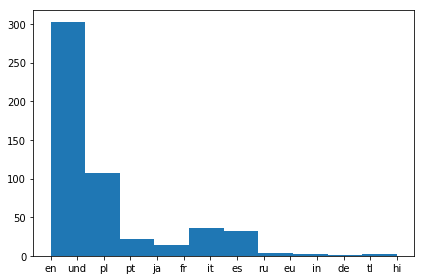

In [84]:
# Extracting language for each tweet and appending it to the list of languages
tweets_languages = []
for tweet in tweets: 
    tweets_languages.append(tweet['lang'])

# Plotting the distribution of languages
%matplotlib inline
plt.hist(tweets_languages)

## 10. Final thoughts
<p>🕵️‍♀️ The last histogram tells us that:</p>
<ul>
<li>Most of the tweets were in English.</li>
<li>Polish, Italian and Spanish were the next runner-ups. </li>
<li>There were a lot of tweets with a language alien to Twitter (lang = 'und'). </li>
</ul>
<p>Why is this sort of information useful? Because it can allow us to get an understanding of the "category" of people interested in this topic (clustering). We could also analyze the device type used by the Twitteratis, <code>tweet['source']</code>, to answer questions like, <strong>"Does owning an Apple compared to Andorid influences people's propensity towards this trend?"</strong>. I will leave that as a <strong>further exercise</strong> for you!</p>
<p><img src="https://assets.datacamp.com/production/project_760/img/languages_world_map.png" style="width: 500px"></p>
<hr>
<p><span style="color:#41859e">
What an exciting journey it has been! We started almost clueless, and here we are.. rich in insights. </span></p>
<p><span style="color:#41859e">
From location based comparisons to analyzing the activity around a tweet to finding patterns from languages and devices, we have covered a lot today — let's give ourselves <b>a well-deserved pat on the back!</b> ✋
</span>
<br><br></p>
<div style="text-align: center;color:#41859e"><b><i>Magic Formula = Data + Python + Creativity + Curiosity</i></b></div>
<p><img src="https://assets.datacamp.com/production/project_760/img/finish_line.jpg" style="width: 500px"></p>

In [86]:
# Congratulations!
print("High Five!!!")

High Five!!!
